In [5]:
import vcf
import pandas as pd 

In [36]:
vcf_reader = vcf.Reader(open('/home/sofiamr/PRCC_project/DATA/AvantiShri/results_AvantiShri/variants/snpeff_indels/VAF_0.2_somatic.indels.snpeff.vcf', 'r'))
i=0
for record in vcf_reader:
    i=i+1
    print (record)
    if (record.is_snp == False):
        if ((record.is_indel ==True) or (record.is_deletion == True)):
            print (record.QUAL)
    if i==50:
        break

import io
import os
import pandas as pd

path = '/home/sofiamr/PRCC_project/DATA/AvantiShri/results_AvantiShri/variants/snpeff_indels/VAF_0.2_somatic.indels.snpeff.vcf'
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_table(
        io.StringIO(str.join(os.linesep, lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str}
    ).rename(columns={'#CHROM': 'CHROM'})

vcf_data_Frame = read_vcf(path)
Counter(vcf_data_Frame.FILTER)

In [268]:
from collections import Counter


Counter({'PASS': 1237})

In [52]:
Normal_depth=  vcf_data_Frame.NORMAL.str.split(":")[0] + vcf_data_Frame.TUMOR.str.split(":")[1] 
Tumor_depth=  vcf_data_Frame.TUMOR.str.split(":")[0] + vcf_data_Frame.TUMOR.str.split(":")[1] 
Normal_depth=  vcf_data_Frame.NORMAL.str.split(":")[0] + vcf_data_Frame.TUMOR.str.split(":")[1] 
Tumor_depth=  vcf_data_Frame.TUMOR.str.split(":")[0] + vcf_data_Frame.TUMOR.str.split(":")[1] 


In [66]:
vcf_data_Frame.TUMOR.str.split(":")[8]

['15', '15', '10,10', '4,5', '1,0', '15.51', '0.52', '0.0', '0.0']

In [62]:
vcf_data_Frame.FORMAT.str.split(":")[0]

['DP', 'DP2', 'TAR', 'TIR', 'TOR', 'DP50', 'FDP50', 'SUBDP50', 'BCN50']

# Extracting High/Moderate impact genes from Somatic mutations


In [427]:
gene_indels = pd.read_table("~/PRCC_project/DATA/AvantiShri/results_AvantiShri/variants/snpeff_indels/snpEff_genes.txt")
gene_indels[gene_indels["variants_impact_HIGH"]==1]
high_risk = list(set(gene_indels[gene_indels["variants_impact_HIGH"]==1].GeneName))
moderate_rist = list(set(gene_indels[gene_indels["variants_impact_MODERATE"]==1].GeneName))
list_of_genes_INDEL = high_risk + moderate_rist 
list_of_genes_INDEL

['FOXO3',
 'NSUN4',
 'ERAP1',
 'TRIP13',
 'FBXO42',
 'ABI3BP',
 'TECPR1',
 'PPIP5K2',
 'ARHGAP35',
 'TMEM80',
 'PLA2G2C',
 'NAT8']

In [428]:
gene_snvs = pd.read_table("/home/sofiamr/PRCC_project/DATA/AvantiShri/results_AvantiShri/variants/snpeff_snvs/snpEff_genes.txt")
gene_snvs
Counter(gene_snvs.variants_impact_HIGH)
gene_snvs[(gene_snvs.variants_impact_HIGH>0)].GeneName# or (gene_snvs.variants_impact_MODERATE>0)]
high_risk = list(set(gene_snvs[(gene_snvs["variants_impact_HIGH"]==1) & (gene_snvs['BioType']=='protein_coding') ].GeneName))
#moderate_rist = list(set(gene_snvs[(gene_snvs["variants_impact_MODERATE"]==1) & (gene_snvs['BioType']=='protein_coding')].GeneName))
list_of_genes_SNV = high_risk #+ moderate_rist
list_of_genes_SNV



['PPP6R3', 'SLC9B1P1', 'SNW1', 'ANAPC1']

In [430]:
### Genes that would be hight rist
list_of_genes_SNV + list_of_genes_INDEL

['PPP6R3',
 'SLC9B1P1',
 'SNW1',
 'ANAPC1',
 'FOXO3',
 'NSUN4',
 'ERAP1',
 'TRIP13',
 'FBXO42',
 'ABI3BP',
 'TECPR1',
 'PPIP5K2',
 'ARHGAP35',
 'TMEM80',
 'PLA2G2C',
 'NAT8']

In [431]:
Counter(gene_snvs[(gene_snvs['BioType']=='protein_coding')]["variants_impact_HIGH"])# and (gene_snvs["variants_impact_HIGH"]>0)]

Counter({0: 12202, 1: 15, 2: 2, 23: 1})

# Citoband coverage

In [712]:
import matplotlib.pyplot as plt

def  obtain_coverage(file_name_coverages):
    coverage_cytobands = pd.read_table(file_name_coverages, names=('Chr','Start','End','band','stain','coverage'))
    
    
    coverage_cytobands['Normalized_cov'] = (coverage_cytobands.coverage/coverage_cytobands.coverage.sum()*1000000000)/(coverage_cytobands.End-coverage_cytobands.Start +1)
    #coverage_cytobands
    Non_centromeric_bancs = coverage_cytobands[(coverage_cytobands.Normalized_cov>0) & (coverage_cytobands.stain != "acen")]
    k2, p = stats.normaltest(Non_centromeric_bancs.Normalized_cov)
    k2,p
    return(Non_centromeric_bancs)

file_name_coverages = "~/PRCC_project/DATA/T1_1A_q30.cov"
Tumor_coverage = obtain_coverage(file_name_coverages)

file_name_coverages = "/home/sofiamr/PRCC_project/DATA/WBBB.cov"
Normal_coverage = obtain_coverage(file_name_coverages)



#Testing normal distribution of Normalized read coverage

In [713]:
from scipy import stats

k2, p = stats.normaltest(Normal_coverage.Normalized_cov)
k2,p

alpha =0.05
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


The null hypothesis can be rejected


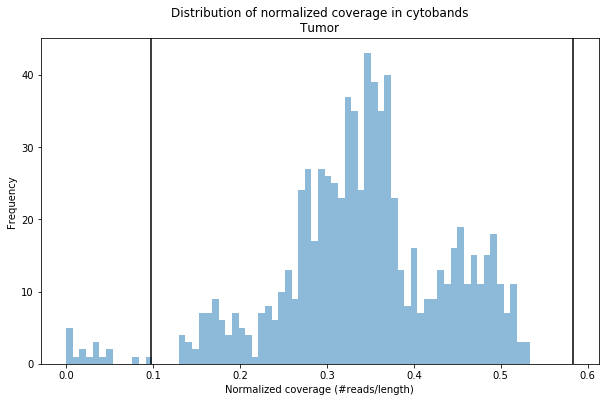

In [734]:
Non_centromeric_bancs = Tumor_coverage

Upper_limit = Non_centromeric_bancs.Normalized_cov.mean() + Non_centromeric_bancs.Normalized_cov.std()*2.5
Lower_limit = Non_centromeric_bancs.Normalized_cov.mean() - Non_centromeric_bancs.Normalized_cov.std()*2.5
plt.figure(figsize=(10,6))
plt.hist(Non_centromeric_bancs.Normalized_cov, 70, alpha=.50)
plt.axvline(Upper_limit, color='k')
plt.axvline(Lower_limit, color='k')
plt.title("Distribution of normalized coverage in cytobands\nTumor")
plt.xlabel('Normalized coverage (#reads/length)')
plt.ylabel('Frequency')
plt.show()

In [735]:
Tumor_coverage[Tumor_coverage.Normalized_cov>Upper_limit] #nothing for the tumor


,Chr,Start,End,band,stain,coverage,Normalized_cov


In [736]:
Low_coverage_Tumor = Tumor_coverage[Tumor_coverage.Normalized_cov<Lower_limit] #nothing for the tumor
Tumor_coverage[Tumor_coverage.Normalized_cov<Lower_limit] #nothing for the tumor #23

,Chr,Start,End,band,stain,coverage,Normalized_cov
35,chr1,128900000,142600000,q12,gvar,17256309,0.004899
293,chr16,38600000,47000000,q11.2,gvar,205228194,0.095028
646,chr6,30400000,32100000,p21.33,gneg,2613374,0.005979
647,chr6,32100000,33500000,p21.32,gpos25,5745898,0.015963
780,chr9,38400000,41000000,p13.1,gneg,53275866,0.079699
781,chr9,41000000,43600000,p12,gpos50,21044426,0.031482
782,chr9,43600000,47300000,p11.2,gneg,45783056,0.048128
785,chr9,50700000,65900000,q12,gvar,2390211,0.000612
811,chrX,0,4300000,p22.33,gneg,58364115,0.052792
851,chrY,0,2500000,p11.32,gneg,3279,0.000005


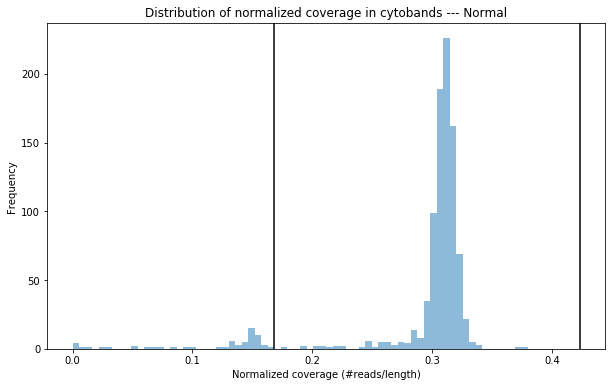

In [737]:
Non_centromeric_bancs = Normal_coverage

Upper_limit = Non_centromeric_bancs.Normalized_cov.mean() + Non_centromeric_bancs.Normalized_cov.std()*2.5
Lower_limit = Non_centromeric_bancs.Normalized_cov.mean() - Non_centromeric_bancs.Normalized_cov.std()*2.5

plt.figure(figsize=(10,6))
plt.hist(Non_centromeric_bancs.Normalized_cov, 70, alpha=.50)
plt.axvline(Upper_limit, color='k')
plt.axvline(Lower_limit, color='k')

plt.title("Distribution of normalized coverage in cytobands --- Normal")
plt.xlabel('Normalized coverage (#reads/length)')
plt.ylabel('Frequency')
plt.show()

In [731]:
Normal_coverage[Normal_coverage.Normalized_cov>Upper_limit] #nothing for the tumor


,Chr,Start,End,band,stain,coverage,Normalized_cov


In [732]:
Low_coverage_Normal = Normal_coverage[Normal_coverage.Normalized_cov<Lower_limit] #nothing for the tumor
Normal_coverage[Normal_coverage.Normalized_cov<Lower_limit] #nothing for the tumor  #27

,Chr,Start,End,band,stain,coverage,Normalized_cov
2,chr21,6800000,10900000,p11.2,gvar,268055903.0,0.142586
255,chr6,27000000,30400000,p22.1,gpos50,214398636.0,0.137524
256,chr6,30400000,32100000,p21.33,gneg,5120678.0,0.006569
257,chr6,32100000,33500000,p21.32,gpos25,10398409.0,0.016198
390,chr9,38400000,41000000,p13.1,gneg,98653495.0,0.082751
391,chr9,41000000,43600000,p12,gpos50,34735135.0,0.029136
392,chr9,43600000,47300000,p11.2,gneg,87632600.0,0.051653
395,chr9,50700000,65900000,q12,gvar,3685991.0,0.000529
396,chr9,65900000,68700000,q13,gneg,172889934.0,0.134663
397,chr9,68700000,72200000,q21.11,gpos25,246333133.0,0.153494


In [733]:
#pd.merge(Low_coverage_Normal,Low_coverage_Tumor, left_on=[''], right_on=[])
#how='left',
shared_differences = pd.merge(Low_coverage_Normal, Low_coverage_Tumor,   left_on=['Chr','Start','End'], right_on = ['Chr','Start','End'])
shared_differences[['Chr','Start','End','Normalized_cov_y','Normalized_cov_x']]

,Chr,Start,End,Normalized_cov_y,Normalized_cov_x
0,chr6,30400000,32100000,0.005979,0.006569
1,chr6,32100000,33500000,0.015963,0.016198
2,chr9,38400000,41000000,0.079699,0.082751
3,chr9,41000000,43600000,0.031482,0.029136
4,chr9,43600000,47300000,0.048128,0.051653
5,chr9,50700000,65900000,0.000612,0.000529
6,chrX,0,4300000,0.052792,0.053390
7,chrY,0,2500000,0.000005,0.000001
8,chrY,2500000,3000000,0.031749,0.096403
9,chrY,3000000,11600000,0.033562,0.101042


In [721]:
shared_differences

,Chr,Start,End,band_x,stain_x,coverage_x,Normalized_cov_x,band_y,stain_y,coverage_y,Normalized_cov_y
0,chr6,30400000,32100000,p21.33,gneg,5120678.0,0.006569,p21.33,gneg,2613374,0.005979
1,chr6,32100000,33500000,p21.32,gpos25,10398409.0,0.016198,p21.32,gpos25,5745898,0.015963
2,chr9,41000000,43600000,p12,gpos50,34735135.0,0.029136,p12,gpos50,21044426,0.031482
3,chr9,43600000,47300000,p11.2,gneg,87632600.0,0.051653,p11.2,gneg,45783056,0.048128
4,chr9,50700000,65900000,q12,gvar,3685991.0,0.000529,q12,gvar,2390211,0.000612
5,chrY,0,2500000,p11.32,gneg,1265.0,0.000001,p11.32,gneg,3279,0.000005
6,chrY,2500000,3000000,p11.31,gpos50,22101823.0,0.096403,p11.31,gpos50,4081403,0.031749
7,chrY,3000000,11600000,p11.2,gneg,398440653.0,0.101042,p11.2,gneg,74209073,0.033562
8,chrY,15100000,19800000,q11.221,gpos50,289899934.0,0.134520,q11.221,gpos50,51193606,0.042365
9,chrY,19800000,22100000,q11.222,gneg,79829534.0,0.075696,q11.222,gneg,14723970,0.024899


In [722]:
Normal_coverage[(Normal_coverage.Chr=="chr6") & (Normal_coverage.Start==30400000)]

,Chr,Start,End,band,stain,coverage,Normalized_cov
256,chr6,30400000,32100000,p21.33,gneg,5120678.0,0.006569


In [723]:
Normal_coverage[(Normal_coverage.Chr=="chr1") & (Normal_coverage.Start== 128900000) ]

,Chr,Start,End,band,stain,coverage,Normalized_cov
507,chr1,128900000,142600000,q12,gvar,21867474.0,0.003481


In [724]:
Tumor_coverage[(Tumor_coverage.Chr=="chr1") & (Tumor_coverage.Start== 128900000) ]

,Chr,Start,End,band,stain,coverage,Normalized_cov
35,chr1,128900000,142600000,q12,gvar,17256309,0.004899


In [725]:
Tumor_coverage.Normalized_cov.describe()

count    800.000000
mean       0.340838
std        0.097171
min        0.000005
25%        0.291144
50%        0.344269
75%        0.397617
max        0.533935
Name: Normalized_cov, dtype: float64

In [645]:
Normal_coverage.Normalized_cov.describe()

count    9.370000e+02
mean     2.954771e-04
std      5.103449e-05
min      1.103534e-09
25%      3.029634e-04
50%      3.095689e-04
75%      3.155564e-04
max      3.797596e-04
Name: Normalized_cov, dtype: float64

In [707]:
Tumor_coverage.shape

(800, 7)